# Fecha de entrega: 06/06/2023
# No. Practica: 06 - CNN - dogs and cats
# Grupo: 6CV3
# Materia: Machine Learning
# INTEGRANTES:
#   * Pérez Mondragón Eduardo
#   * Rosiles Hidalgo Emanuel

Found 6400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


C:\Users\ricar\AppData\Local\Temp\ipykernel_24604\2955922927.py:100: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it,


Epoch 1/100
200/200 [==============================] - 217s 1s/step - loss: 0.6956 - accuracy: 0.4908 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/100
200/200 [==============================] - 11s 56ms/step - loss: 0.6940 - accuracy: 0.4906 - val_loss: 0.6920 - val_accuracy: 0.5475
Epoch 3/100
200/200 [==============================] - 10s 52ms/step - loss: 0.6927 - accuracy: 0.5144 - val_loss: 0.6911 - val_accuracy: 0.5400
Epoch 4/100
200/200 [==============================] - 12s 57ms/step - loss: 0.6916 - accuracy: 0.5241 - val_loss: 0.6904 - val_accuracy: 0.5725
Epoch 5/100
200/200 [==============================] - 11s 52ms/step - loss: 0.6906 - accuracy: 0.5286 - val_loss: 0.6896 - val_accuracy: 0.5625
Epoch 6/100
200/200 [==============================] - 11s 56ms/step - loss: 0.6897 - accuracy: 0.5431 - val_loss: 0.6890 - val_accuracy: 0.5525
Epoch 7/100
200/200 [==============================] - 10s 50ms/step - loss: 0.6887 - accuracy: 0.5552 - val_loss: 0.6883 - val_acc

200/200 [==============================] - 10s 49ms/step - loss: 0.6071 - accuracy: 0.6792 - val_loss: 0.6078 - val_accuracy: 0.6575
Epoch 58/100
200/200 [==============================] - 10s 52ms/step - loss: 0.6051 - accuracy: 0.6766 - val_loss: 0.6060 - val_accuracy: 0.6625
Epoch 59/100
200/200 [==============================] - 10s 48ms/step - loss: 0.6040 - accuracy: 0.6784 - val_loss: 0.6041 - val_accuracy: 0.6825
Epoch 60/100
200/200 [==============================] - 10s 50ms/step - loss: 0.6015 - accuracy: 0.6778 - val_loss: 0.6021 - val_accuracy: 0.6750
Epoch 61/100
200/200 [==============================] - 10s 50ms/step - loss: 0.5995 - accuracy: 0.6841 - val_loss: 0.6071 - val_accuracy: 0.6725
Epoch 62/100
200/200 [==============================] - 10s 52ms/step - loss: 0.5986 - accuracy: 0.6817 - val_loss: 0.5973 - val_accuracy: 0.6875
Epoch 63/100
200/200 [==============================] - 11s 53ms/step - loss: 0.5971 - accuracy: 0.6800 - val_loss: 0.5976 - val_accuracy

C:\Users\ricar\AppData\Local\Temp\ipykernel_24604\2955922927.py:115: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)


13/13 [==============================] - 1s 51ms/step - loss: 0.5675 - accuracy: 0.7000
> 70.000


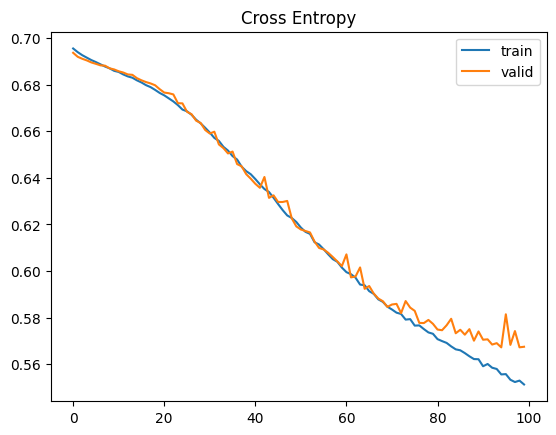

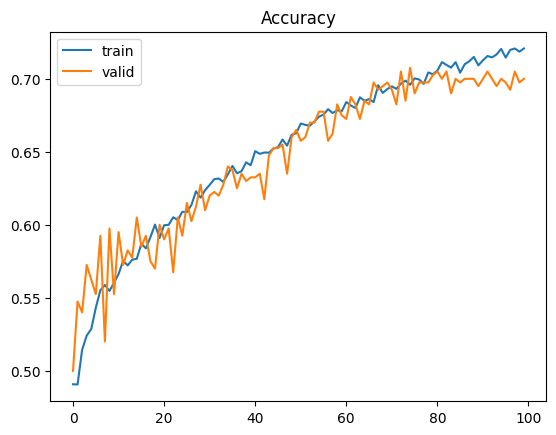

In [1]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

"""
# Definicion y configuracion de la arquitectura de la CNN.
Se utiliza una capa de convolución, una capa de pooling, una capa de aplanamiento (flatten)
y una capa completamente conectada.
"""
def define_model():
    model = Sequential()
    # Se tienen 7 filtros y cada filtro tiene un tamaño de kernel de 3x3. 
    # La función de activación es la función ReLU. 
    # La forma de entrada de los datos es (32, 32, 3), 
    #    Se esperan imágenes de tamaño 32x32 píxeles con 3 canales de color (RGB).
    model.add(Conv2D(7, (3, 3), strides=(2,2), activation='relu', input_shape=(32, 32, 3), padding='valid'))
    # Esta capa convierte la salida 2D de la capa anterior en un vector unidimensional
    model.add(MaxPooling2D((3, 3), strides= (2,2) ))
    # Esta capa convierte la salida 2D de la capa anterior en un vector unidimensional
    model.add(Flatten())
    # Tiene solo 1 neurona, con funcion sigmoide para la clasificacion binaria (producir salidas entre 0 y 1), para la pertenencia a una clase
    # Se agrego la capa completamente conectada antes de la de salida debido a la siguiente referencia:
    #       "if you add one more fully connected layer other than the current ones, you can achieve a better outcome. 
    #       People usually add two hidden fully connected layers after convolutional layers and before the output layer. 
    #       The reason is that convolutional layers try to extract features in a differentiable manner, and fully connected layers try to classify the features."
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    # optimizador estocástico de descenso de gradiente (SGD)
    opt = SGD(learning_rate = 0.01)
    # Compila el modelo con el optimizador, la función de pérdida y las métricas especificadas. 
    # El optimizador SGD, la pérdida binaria cruzada y la métrica de precisión (accuracy) 
    #    se utilizan para entrenar y evaluar el modelo en un problema de clasificación binaria.
    #       > La métrica de precisión (accuracy) se utiliza comúnmente en problemas de clasificación 
    #         para evaluar el rendimiento de un modelo de aprendizaje automático.
    #         Mide la fracción de muestras clasificadas correctamente por el modelo en relación 
    #         con el total de muestras.
    #       > la funcion de perdida binary_crossentropy ayuda al modelo a aprender a distinguir 
    #         entre las dos clases y a ajustar sus parámetros para mejorar su capacidad de clasificación. 
    #         Durante el entrenamiento, el modelo busca minimizar la pérdida.
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

"""
Esta función muestra gráficas de la pérdida (loss) y la precisión (accuracy) durante el entrenamiento del modelo.
"""
def summarize_diagnostics(history):
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.legend(['train','valid'])
    pyplot.title('Cross Entropy')
    pyplot.show()

    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.legend(['train','valid'])
    pyplot.title('Accuracy')
    pyplot.show()

"""
Esta función ejecuta el proceso completo de entrenamiento y evaluación del modelo.
"""
def run_model():
    # Definición del modelo
    model = define_model()

    # Preprocesamiento de datos
    # El parámetro rescale=1.0/255.0 se utiliza para reescalar los valores de los píxeles de las imágenes. 
    # Normalmente, los valores de los píxeles de una imagen están en el rango de 0 a 255, donde 0 representa el 
    # color negro y 255 representa el color blanco.
    # 
    # Al dividir cada valor de píxel por 255, se realiza una normalización para asegurarse de que todos los 
    # valores de píxel estén en un rango de 0 a 1. 
    datagen = ImageDataGenerator(rescale=1.0/255.0,
                                 validation_split=0.2)

    # Generación del conjunto de entrenamiento
    # El método se usa para cargar imágenes desde el directorio y generar lotes de datos de manera eficiente
    #   En este caso en lotes de 32 imagenes
    #   Se indica que se trata de un problema de clasificacion binaria
    #   Se establece el tamaño objetivo de las imagenes
    train_it = datagen.flow_from_directory('training_set',
                                           class_mode='binary',
                                           batch_size=32,
                                           target_size = (32, 32),
                                           subset = 'training')
    
    # Generación del conjunto de prueba
    test_it = datagen.flow_from_directory('test_set',
                                          class_mode='binary',
                                          batch_size = 32,
                                          target_size = (32, 32),
                                          subset = 'validation')

    # Entrenamiento del modelo
    history = model.fit_generator(train_it, 
                                  steps_per_epoch = len(train_it), # Especifica el número de pasos por época de entrenamiento. 
                                                                   #    En este caso, se establece como la longitud del generador train_it, 
                                                                   #    lo que nos dice que se procesarán todos los lotes de entrenamiento en cada época.
                                  validation_data = test_it,       # Se pasa el generador test_it que contiene los datos de prueba. 
                                                                   #    Este generador proporcionará lotes de imágenes de prueba para evaluar el modelo durante el entrenamiento.
                                  validation_steps = len(test_it), # Especifica el número de pasos de validación. 
                                                                   #    En este caso, se establece como la longitud del generador test_it, 
                                                                   #    lo que significa que se procesarán todos los lotes de prueba en cada época de validación.
                                  epochs = 100,                     # El modelo se entrenará en 40 iteraciones completas del conjunto de datos de entrenamiento.
                                  verbose=1)

    # Evaluación del modelo en el conjunto de prueba
    # Se calcularná las métricas de pérdida y precisión del modelo utilizando los datos de prueba del generador test_it
    # Y se asignara la métrica de precisión a la variable acc.
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
    print('> %.3f' % (acc * 100.0))

    # Resumen de los diagnósticos (gráficas)
    summarize_diagnostics(history)

run_model()

<h1 style="color:red;"> CONCLUSIONES </h1>
 
<h2 style="text-align: justify;"> Podemos concluir que al aplicar diferentes parámetros a nuestro modelo, la red neuronal sufre cambios que pueden 
mejorar o afectar su desempeño. Además, nos dimos cuenta que aunque obtengamos un accuracy alto en nuestra red neuronal, 
no siempre significa que la red tenga un buen rendimiento, pues en algunos casos alcanzamos valores de 
accuracy cercano a el 80%, pero conforme aumentaban las épocas, la red iban mostrando una tendencia a sobreentrenamiento 
lo cual significa que el modelo se apega mucho a los datos de entrenamiento provocando un bajo rendimiento al analizar nuevos datos. 
Por lo tanto, es importante conocer bien los datos con los que estamos trabajando ya que así podemos identificar mejor los 
parámetros adecuados para aplicar en nuestra arquitectura de red neuronal. </h2>